<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0321_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리]

## 핸즈온 Chapter 4. 분류 p.157~202

<선형 회귀 모델 훈련 방법>

1. 계산 가능한 공식 사용하여 비용함수를 최소화 하는 모델 파라미터 구하기
2. 경사 하강법(GD) 최적화 방식을 사용하여 비용함수 최소화

> 결국 비용함수를 최소화 하는 파라미터를 찾아 최적화된 모델 찾기

### 4.1 선형 회귀

대표적인 성능 측정 지표: 평균제곱근 오차(RMSE)

#### 4.1.1 정규방정식

$\hat{\theta}= (X_b^TX_b)^{-1}X_b^Ty$

    np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #dot: 행렬곱셈

LinearRegression클래스의 기반 비용 함수: SVD 특잇값 분해 기법을 사용해 게산된 유사역행렬을 사용하여 계산
    
    scipy.linalg.lstsq(X-b, y)

    np.linalg.pinv(X_b).dot(y)#와 동일; 유사역행렬


#### 4.1.2 계산 복잡도

정규방정식 >> SVD

예측 계산 복잡도는 샘플 수와 특성 수의 비례


### 4.2 경사 하강법

: 학습 과정을 통해 파라미터가 무작위하게 초기화된 후 반복적으로 수정하며 비용 함수를 최소화 (파라미터 공간 찾기)

<파라미터>
- 학습률(learning rate): 스탭의 크기

<경사 하강법의 문제점>
- 왼쪽 시작시 global minimum보다 local minimum에 수렴될 가능성
- 오른쪽 시작시 평지를 뛰어넘지 못하고 global minimum에 도달 못함

> StandardScaler 등을 사용해야 함

#### 4.2.1 배치 경사 하강법

: 매 경사 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산

단점: 큰 훈련 세트에서 속도 느림

장점: 특성 수에 민감하지 않음 (bette than 정규방정식, SVD 분해)

#### 4.2.2 확률적 경사 하강법

: 매 스텝 한 개의 샘플을 무작위로 선택하여 그레이디언트 계산

장점: 빠름

단점: 불안정, 요동치면서 평균적으로 감소, 최솟값에 안착하지 못하는 경우 많음

해결방안: **학습률을 점진적으로 감소 (학습 스케줄)**



```
from sklearn.linear_model import SGDRegressor
SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
```



#### 4.2.3 미니배치 경사 하강법

: 임의의 작음 샘플 세트에 대해 그레이디언트 계산

장점: GPU 사용에서 얻는 성능 향상(행렬 연산에 용이), SGD보다 덜 불규칙

단점: local minimum 극복 어려움

### 4.3 다항 회귀



```
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(degree=#, include_bias=False)
```
degree=3일 때, $a^2, a^3, b^2, b^3, ab, a^2b, ab^2$도 추가


### 4.4 학습 곡선

: 모델의 과대적합, 과소적합 확인

훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련

<편향/분산 트레이트오프>
- 모델의 복잡도 커지면 분산 up, 편향 down
- 모델의 복잡도 줄어들면 편향 up, 분산 down
> "트레이드 오프" 

### 4.5 규제가 있는 선형 모델

가중치 제한 방식에 따른 여러 규제 모델

#### 4.5.1 릿지 회귀

비용함수 $J(\theta)=MSE(\theta) + \alpha\frac{1}{2}\Sigma\theta_i^2$



```
#StandardScaler 사용 후
from sklearn.linear_model import Ridge
Ridge(alpha=0~1, solver="cholesky")

SGDRegressor(penalty="l2")#와 동일

```

#### 4.5.2 라쏘 회귀
비용함수 $J(\theta)=MSE(\theta) + \alpha\Sigma|\theta_i|$

덜 중요한 특성의 가중치 제거, 특성 선택 후 희소 모델 만듦

```
from sklearn.linear_model import Lasso
Ridge(alpha=0~1, solver="cholesky")

SGDRegressor(penalty="l1")#와 동일

```

#### 4.5.3 엘라스틱넷

규제항: 릿지와 회귀의 규제항을 단순히 더해 혼합 비율 r을 사용

r=0 -> 릿지 회귀

r=1 -> 라쏘 회귀

특성 수 > 훈련 샘플 수, 특성 간의 관계가 뚜렷할 때 라쏘보단 엘라스틱 넷



```
from sklearn.linear_model import ElasticNet
ElasticNet(alpha=0~1, lr_ratio=0~1)
```



#### 4.5.4 조기 종료

: 검증 에러가 최소에 도달하는 즉시 훈련을 멈춰 과대적합 방지

### 4.6 로지스틱 회귀
: 분류를 위한 회귀 알고리즘

- 이진 분류: 로지스틱 회귀 활용
- 다중 클래스 분류: 소프트맥스 회귀 활용

#### 4.6.1 확률 추정

로지스틱 함수를 사용해 샘플x가 양성 클래스에 속할 확률을 계산

0.5이상이면 양성 0.5 미만이면 음성으로 분류

#### 4.6.2 훈련과 비용함수

#### 4.6.3 결정 경계



```
from sklearn.linear_model import LogisticRegression
LogisticRegression()

model.predict_proba(X) # 추정 확률 계산
```

#### 4.6.4 소프트맥스 회귀(=다항 로지스틱 회귀)

: 추정 확률이 가장 높은 클래스로 분류

크로스 엔트로피 비용 함수를 최소화



```
LogisticRegresssion(multi_class="multinomial", solver="lbfgs" 소프트맥스, C=#규제#)
```




# [필사]

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
#X로부터 X_b 생성
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.08296256],
       [2.93168747]])

> $\theta_0=4, \theta_1=3$ 기대했으나 잡음에 의해 나오지 않음 

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08296256],
       [9.94633751]])

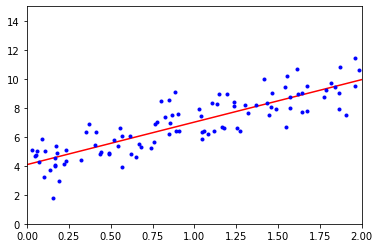

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
#사이킷런의 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08296256]), array([[2.93168747]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.08296256],
       [9.94633751]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08296256],
       [2.93168747]])

In [ ]:
np.linalg.pinv(X_b).dot(y) #유사역행렬

array([[4.08296256],
       [2.93168747]])



---



---



In [ ]:
# 4.2.1 배치 경사 하강법
eta = 0.1  # 학습률
n_iterations = 1000
m = 100 #샘플수

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.08296256],
       [2.93168747]])

array([[4.08445286],
       [2.92602351]])

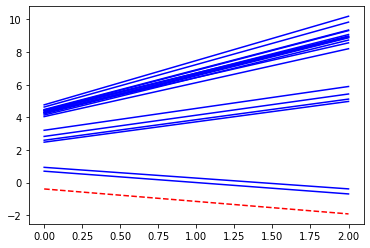

In [ ]:
# 4.2.2 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 학습 모델 그리기 (처음 20번만 그림)
        if epoch == 0 and i < 20:           
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 샘플 무작위 선택
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # 그레이디언트 계산
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # 학습률 조정
        eta = learning_schedule(epoch * m + i)
        # 파라미터 조정
        theta = theta - eta * gradients

theta

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08299253]), array([2.8973857]))



---



---



In [ ]:
# 4.3 다항회귀: 2차방정식 비선형 데이터
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([-0.86601957])

In [ ]:
X_poly[0]

array([-0.86601957,  0.7499899 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.26364037]), array([[0.93578355, 0.42227365]]))



---



---



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # 평균 제곱근 오차 그래프 그리기
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

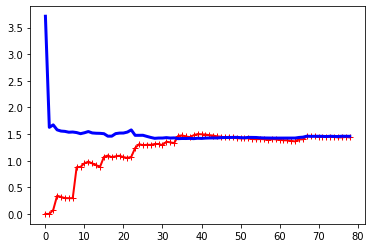

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

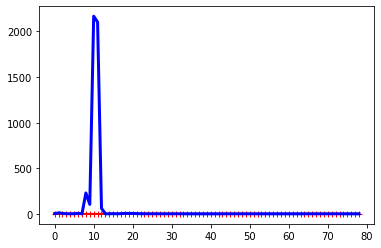

In [ ]:
# 10차 다항 회귀 모델의 학습 곡선 그리기
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)



---



---



In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.96718159]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95341184])

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.91983326])

In [ ]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.92340674])

In [ ]:
# 조기 종료
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)



---



---



In [ ]:
# 로지스틱 회귀
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int) # Iris virginica이면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

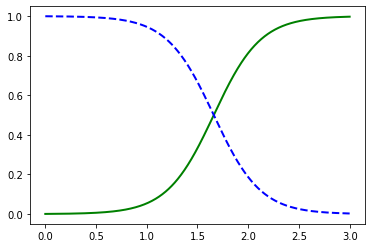

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [ ]:
log_reg.predict([[1.67], [1.66]])

array([1, 0])

In [ ]:
# 소프트맥스 회귀
X = iris["data"][:, (2, 3)] #꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])